# Fall 2020 Project - Eric Chen

**Loading data**

In [155]:
import pandas as pd

flights = pd.read_csv("flights.csv")

In [156]:
american = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'AA'), 'ARRIVAL_DELAY']
united = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'UA'), 'ARRIVAL_DELAY']

## Hypothesis Test #1

We want to compare the average arrival delay between American Airlines and United Airlines.

**Check test assumptions:**

In [157]:
american = american.dropna()
united = united.dropna()

print(american.count())
print(united.count())

280
302


Both sample sizes are large ($\geq$ 30).

**Boxplot**

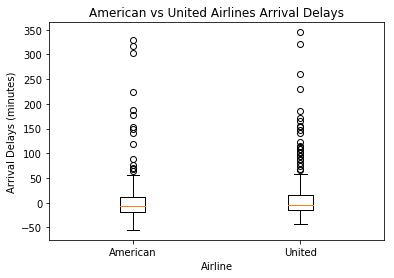

In [158]:
import matplotlib.pyplot as plt

plt.boxplot([american, united], labels = ["American", "United"])
plt.title("American vs United Airlines Arrival Delays")
plt.xlabel("Airline")
plt.ylabel("Arrival Delays (minutes)")
plt.show()

**Hypotheses**

Null hypothesis: The average arrival delay for American Airlines and United Airlines are the same.

Alternative hypothesis: The average arrival delay for American Airlines is less than the average arrival delay for United Airlines.

$H_0: \mu_1 = \mu_2$

$H_A: \mu_1 < \mu_2$

**z-test for 2 population means at significance level $\alpha = 0.05$**

In [159]:
# compute test statistic
z = (american.mean() - united.mean()) / ((american.std() ** 2 / len(american) + united.std() ** 2 / len(united)) ** 0.5)
z

-1.3926811323141544

In [160]:
# compute p=value
from scipy.stats import norm

p_value = norm.cdf(z)
p_value

0.08185811830196899

**Conclusion**

Because the $p$-value is greater than $0.05$, we fail to reject the null hypothesis and conclude there is no evidence that the average arrival delay for American Airlines is less than the average arrival delay for United Airlines.

## Hypothesis Test #2

We want to compare the probability of flights delaying over an hour between American Airlines and United Air Lines.

**Loading data**

We only want rows where the arrival delay is more than an hour.

In [161]:
american_late = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'AA') & (flights['ARRIVAL_DELAY'] > 60), 'ARRIVAL_DELAY']
united_late = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'UA') & (flights['ARRIVAL_DELAY'] > 60), 'ARRIVAL_DELAY']

**Check test assumptions**

In [162]:
x1 = american_late.count()
n1 = american.count()
p1 = x1 / n1
print(n1 * p1)
print(n1 * (1 - p1))

x2 = united_late.count()
n2 = united.count()
p2 = x2 / n2
print(n2 * p2)
print(n2 * (1 - p2))

15.0
265.0
26.0
276.0


$n \cdot p \geq 10$ and $n \cdot (1-p) \geq 10$ for both populations. 

**Hypotheses**

Null hypothesis: The probability of flights delaying over an hour for American Airlines is equal to that of United Airlines.

Alternative hypothesis: The probability of flights delaying over an hour for American Airlines is not equal to that of United Airlines.

$H_0: \mu_1 = \mu_2$

$H_A: \mu_1 \neq \mu_2$

**z-test at significance level $\alpha = 0.05$**

In [163]:
# compute test statistic
p = (x1 + x2) / (n1 + n2)
z = (p1 - p2) / (p * (1 - p) * (1 / n1 + 1 / n2)) ** 0.5
z

-1.5318672735156422

In [164]:
# compute p-value
p_value = norm.cdf(z) * 2
p_value

0.12555519084273978

**Conclusion**

Because the $p$-value is greater than $0.05$, we fail to reject the null hypothesis and conclude there is no evidence that the probability of flights delaying over an hour for American Airlines is not equal to that of United Airlines.

## Hypothesis Test #3

Question: Is the average air time of Delta Airlines flights less than the average air time of Virgin America flights?

**Loading data**

In [165]:
delta = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'SFO') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'DL'), 'AIR_TIME']
virgin = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'SFO') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'VX'), 'AIR_TIME']

**Check test assumptions**

In [166]:
delta = delta.dropna()
virgin = virgin.dropna()

print(delta.count())
print(virgin.count())

260
285


Both sample sizes are large ($\geq$ 30).

**Hypotheses**

Null hypothesis: The average air time for American Airlines flights and United Airlines flights are the same.

Alternative hypothesis: The average air time for American Airlines flights is less than that of United Airlines flights.

$H_0: \mu_1 = \mu_2$

$H_A: \mu_1 < \mu_2$

**z-test at significance level $\alpha = 0.05$**

In [167]:
# compute test statistic
z = (delta.mean() - virgin.mean()) / ((delta.std() ** 2 / len(delta) + virgin.std() ** 2 / len(virgin)) ** 0.5)
z

-0.30229562111122354

In [168]:
# compute p-value
p_value = norm.cdf(z)
p_value

0.3812133580696913

**Conclusion**

Because the $p$-value is greater than 0.05, we fail to reject the null hypothesis and conclude there is no evidence that the average air time for Delta Airlines flights is less than that of Virgin America flights.

## Multiple Comparisons

**Bonferroni's Correction**

With a family-wise error rate of $\alpha = 0.05$, the new significance level $\alpha^*$ for each test is:

In [169]:
0.05 / 3

0.016666666666666666

**Hypothesis Test 1**

The $p$-value 0.0819 is greater than $\alpha^*$, so we still fail to reject the null hypothesis and conclude there is no evidence that the average arrival delay for American Airlines is less than the average arrival delay for United Airlines.

**Hypothesis Test 2**

The $p$-value 0.1256 is greater than $\alpha^*$, so we still fail to reject the null hypothesis and conclude there is no evidence that the probability of flights delaying over an hour for American Airlines is not equal to that of United Airlines.

**Hypothesis Test 3**

The $𝑝$-value 0.3812 is greater than $\alpha^*$, so we still fail to reject the null hypothesis and conclude there is no evidence that the average air time for Delta Airlines flights is less than that of Virgin America flights.